In [2]:
using Pkg
using Serialization
using DataFrames
using StatsPlots
Pkg.activate("..")
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")
include("velocity_obstacles.jl")

  Activating project at `~/repos/ProactiveHRI.jl`


reactive_velocity_obstacles (generic function with 1 method)

In [3]:
proactiveHRI_robot_cooperative_human_circular = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_circular.dat")
proactiveHRI_robot_cooperative_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_head_on.dat")
SFM_robot_cooperative_human_circular = deserialize("../experimental_results/SFM_robot_cooperative_human_circular.dat")
SFM_robot_cooperative_human_head_on = deserialize("../experimental_results/SFM_robot_cooperative_human_head_on.dat")
HJ_robot_cooperative_human_circular = deserialize("../experimental_results/HJ_robot_cooperative_human_circular.dat")
HJ_robot_cooperative_human_head_on = deserialize("../experimental_results/HJ_robot_cooperative_human_head_on.dat")
OC_robot_cooperative_human_circular = deserialize("../experimental_results/OC_robot_cooperative_human_circular.dat")
OC_robot_cooperative_human_head_on = deserialize("../experimental_results/OC_robot_cooperative_human_head_on.dat")

proactiveHRI_robot_oc_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_oc_human_head_on.dat")
SFM_robot_oc_human_head_on = deserialize("../experimental_results/SFM_robot_oc_human_head_on.dat")
HJ_robot_oc_human_head_on = deserialize("../experimental_results/HJ_robot_oc_human_head_on.dat")
OC_robot_oc_human_head_on = deserialize("../experimental_results/oc_robot_oc_human_head_on.dat")




Dict{String, SimMetrics} with 199 entries:
  "Run 151" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 140" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 20"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 35"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 192" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 127" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 137" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 181" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 15"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 60"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 150" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 99"  => SimMetrics(SimData(IPSimParams(PlannerParams(Planne

In [35]:
b = ["Ours: Robot"]
for i in 1:198
    push!(b, "Ours: Robot")
end
for i in 1:199
    push!(b, "Ours: Human")
end
for i in 1:199
    push!(b, "SFM: Robot")
end
for i in 1:199
    push!(b, "SFM: Human")
end
for i in 1:199
    push!(b, "HJ: Robot")
end
for i in 1:199
    push!(b, "HJ: Human")
end
for i in 1:199
    push!(b, "OC: Robot")
end
for i in 1:199
    push!(b, "OC: Human")
end

In [36]:
data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199];[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]]

1592-element Vector{Float64}:
 4.7767637449015075
 4.8308511871466635
 4.794514128200691
 4.869988649962186
 4.801452949064725
 4.711696165879048
 4.80867179127615
 4.7379059174423785
 4.708300264264047
 4.830961352373747
 ⋮
 6.489013489114156
 6.25296943292288
 5.605341171690763
 5.989698242205687
 6.180143730089214
 6.106503322145329
 6.006430798419746
 6.18458081679608
 6.13422350234538

In [46]:
PHRI_robot_df = DataFrame(A=data[1:199], B=b[1:199])
PHRI_human_df = DataFrame(A=data[200:398], B=b[200:398])
SFM_robot_df = DataFrame(A=data[399:597], B=b[399:597])
SFM_human_df = DataFrame(A=data[598:796], B=b[598:796])
HJ_robot_df = DataFrame(A=data[797:995], B=b[797:995])
HJ_human_df = DataFrame(A=data[996:1194], B=b[996:1194])
OC_robot_df = DataFrame(A=data[1195:1393], B=b[1195:1393])
OC_human_df = DataFrame(A=data[1393:end], B=b[1393:end])



Row,A,B
,Float64,String
1,5.57345,OC: Robot
2,5.86878,OC: Human
3,5.97579,OC: Human
4,5.65293,OC: Human
5,5.90014,OC: Human
6,6.38591,OC: Human
7,5.85907,OC: Human
8,5.865,OC: Human
9,5.56462,OC: Human


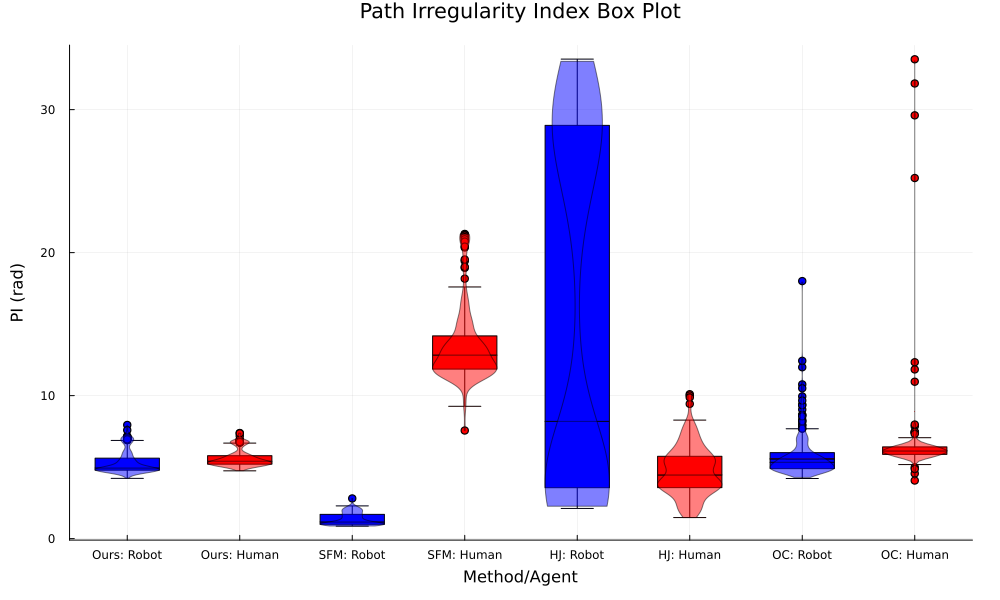

In [51]:
@df PHRI_robot_df boxplot(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index Box Plot", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue)
@df PHRI_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df SFM_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df SFM_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df HJ_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df OC_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df OC_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df PHRI_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df SFM_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df SFM_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df HJ_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df HJ_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df OC_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df OC_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)

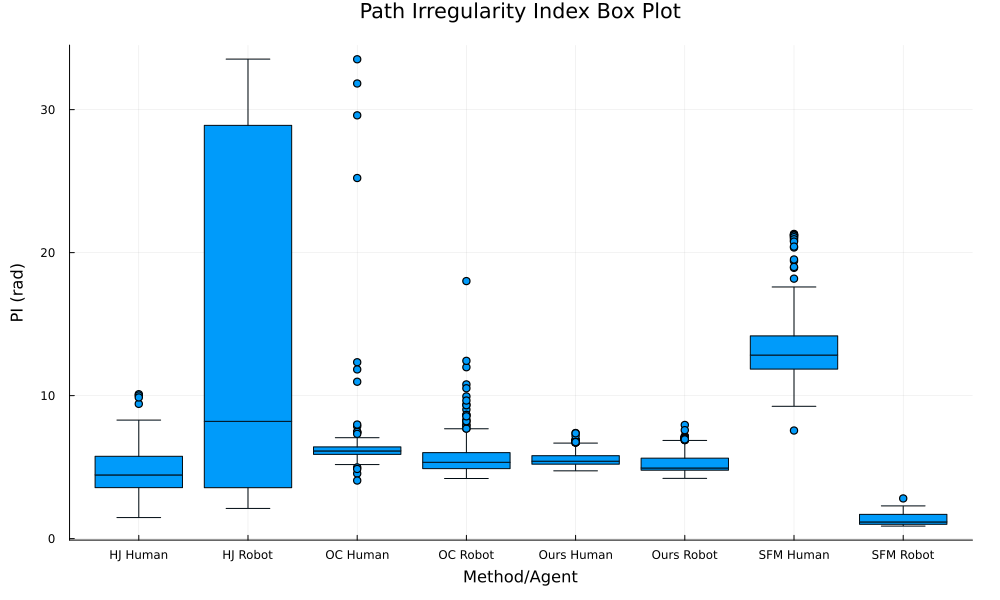

In [23]:
@df df boxplot(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index Box Plot", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm)

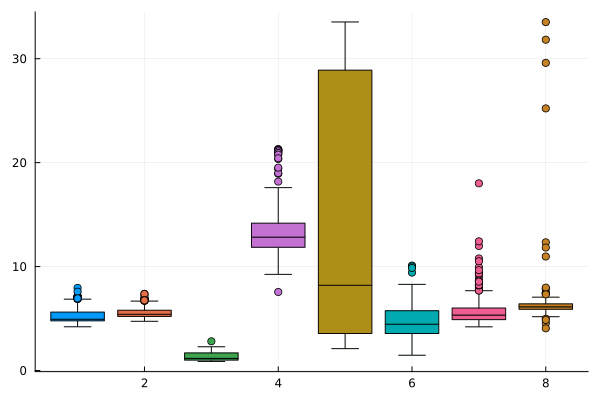

In [27]:
boxplot!(plot, [proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199], label="")
boxplot!(plot, [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199], label="")
boxplot!(plot, [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199], label="")
boxplot!(plot, [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199], label="")
boxplot!(plot, [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199], label="")
boxplot!(plot, [OC_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199], label="")
boxplot!(plot, [OC_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199], label="")

In [ ]:
[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199],
[SFM_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199],
[SFM_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199],
[HJ_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199],
[HJ_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199],
[OC_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199],
[OC_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199],